In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,auc,precision_recall_curve, \
                            accuracy_score,recall_score,f1_score,confusion_matrix,classification_report
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
print(df.shape)
df.head(5)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


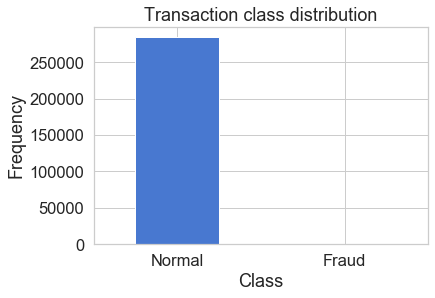

In [4]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

We can see that the data is super unbalanced.

In [5]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
print('info of frauds:')
print(frauds.shape)
print(frauds.Amount.describe())
print('info of normal:')
print(normal.shape)
print(normal.Amount.describe())

info of frauds:
(492, 31)
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
info of normal:
(284315, 31)
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


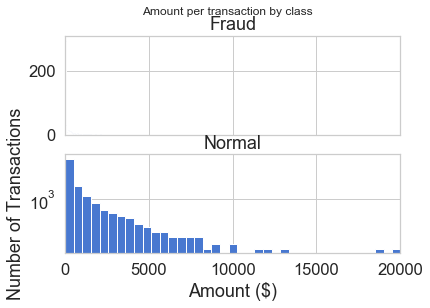

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

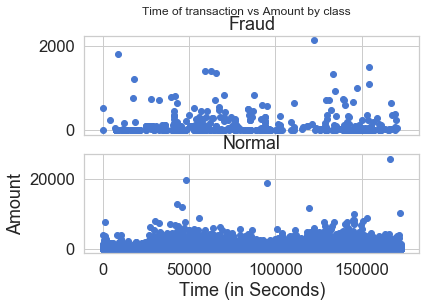

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

#### No obvious correlation between time and frauds, so get rid of the column of time and Perform standarization on 'Amount'.

In [8]:
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

           Class
V1     -0.101347
V2      0.091289
V3     -0.192961
V4      0.133447
V5     -0.094974
V6     -0.043643
V7     -0.187257
V8      0.019875
V9     -0.097733
V10    -0.216883
V11     0.154876
V12    -0.260593
V13    -0.004570
V14    -0.302544
V15    -0.004223
V16    -0.196539
V17    -0.326481
V18    -0.111485
V19     0.034783
V20     0.020090
V21     0.040413
V22     0.000805
V23    -0.002685
V24    -0.007221
V25     0.003308
V26     0.004455
V27     0.017580
V28     0.009536
Amount  0.005632
Class   1.000000


Text(0.5, 1, 'Heatmap of Correlation')

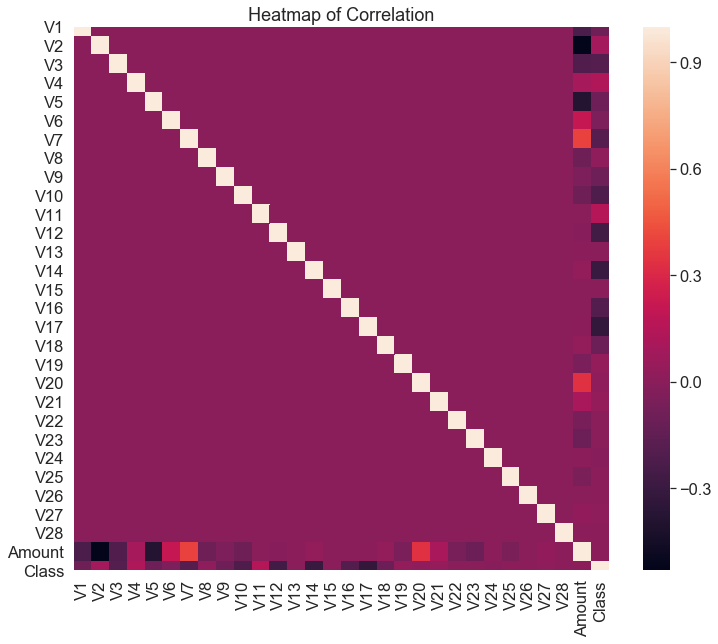

In [9]:
#heatmap
corr = data.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
corr_class = corr[['Class']]
print(corr_class)
plt.title('Heatmap of Correlation')

#### There are no features that have high correlation. So we keep all features for now.

### Sampling (deal with unbalanced data)

Split dataset

In [10]:
X_train_data,X_test_data = train_test_split(data,test_size = 0.25,random_state=42)
y_data = data[['Class']]
X_data = data.drop(['Class'], axis=1)
y_train = X_train_data[['Class']]
y_test = X_test_data[['Class']]
X_train = X_train_data.drop(['Class'], axis=1)
X_test = X_test_data.drop(['Class'], axis=1)

#### subsampling

In [11]:
def sub_sample_data(df,percent = 1):
    data1 = df[df.Class == 1]
    data0 = df[df.Class == 0]
    index = np.random.randint(len(data0),size = percent*len(data1))
    lower_data = data0.iloc[list(index)]
    return (pd.concat([lower_data, data1]))

In [12]:
print(len(y_train), 'samples in training dataest')
print(len(y_train[y_train.Class == 0]),'normal samples in training dataest')
print(len(y_train[y_train.Class == 1]),'fraud samples in training dataest')
print('After sub-sampling')
data_sub = sub_sample_data(X_train_data,percent = 1)
data_sub = data_sub.sample(frac=1)

y_train_sub = data_sub[['Class']]
X_train_sub = data_sub.drop(['Class'], axis=1)
data_sub = pd.concat([X_train_sub, y_train_sub], axis=1)
print(len(data_sub),'samples in subsampled data')
print(len(y_train_sub[y_train_sub.Class == 0]),'normal samples in subsampled dataest')
print(len(y_train_sub[y_train_sub.Class == 1]),'fraud samples in subsampled dataest')

213605 samples in training dataest
213226 normal samples in training dataest
379 fraud samples in training dataest
After sub-sampling
758 samples in subsampled data
379 normal samples in subsampled dataest
379 fraud samples in subsampled dataest


#### upsampling(SMOTE)

In [13]:
from imblearn.over_sampling import SMOTE

print(len(y_train), 'samples in training dataest')
print(len(y_train[y_train.Class == 0]),'normal samples in training dataest')
print(len(y_train[y_train.Class == 1]),'fraud samples in training dataest')
smote = SMOTE(random_state = RANDOM_SEED)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

data_over = pd.concat([X_train_over, y_train_over], axis=1)
data_over = data_over.sample(frac=1)

print('After SMOTE')
print(len(y_train_over), 'samples in oversampled dataest')
print(len(y_train_over[y_train_over.Class == 0]),'normal samples in oversampled dataest')
print(len(y_train_over[y_train_over.Class == 1]),'fraud samples in oversampled dataest')

y_train_over = data_over[['Class']]
X_train_over = data_over.drop(['Class'], axis=1)

213605 samples in training dataest
213226 normal samples in training dataest
379 fraud samples in training dataest
After SMOTE
426452 samples in oversampled dataest
213226 normal samples in oversampled dataest
213226 fraud samples in oversampled dataest


#### Correlation analysis

sub sampling

Features With High Negative Correlation
        Class
V3  -0.565214
V9  -0.545624
V10 -0.633763
V12 -0.689842
V14 -0.749026
V16 -0.590952
V17 -0.548226
  
Features With High Positive Correlation
          Class
V4     0.714148
V11    0.684642
Class  1.000000


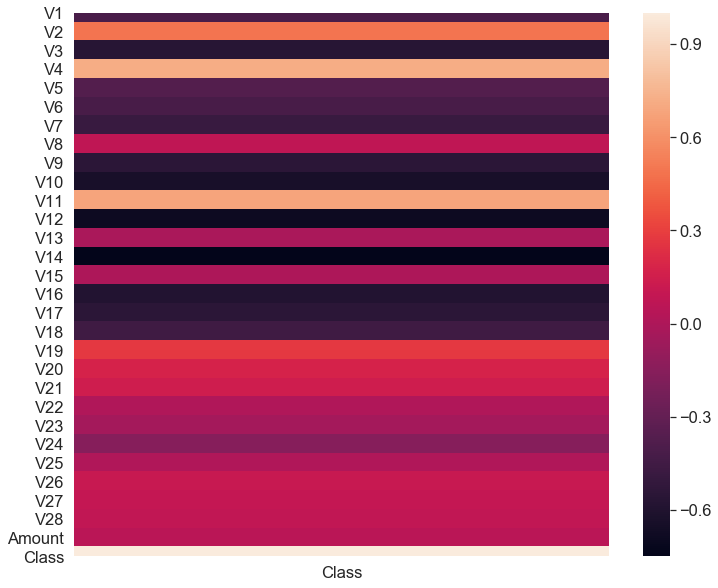

In [14]:
corr_sub = data_sub.corr()
corr_sub = corr_sub[['Class']]
corr_sub
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr_sub)
print('Features With High Negative Correlation')
print(corr_sub[corr_sub.Class < -0.5])
print('  ')
print('Features With High Positive Correlation')
print(corr_sub[corr_sub.Class > 0.5])

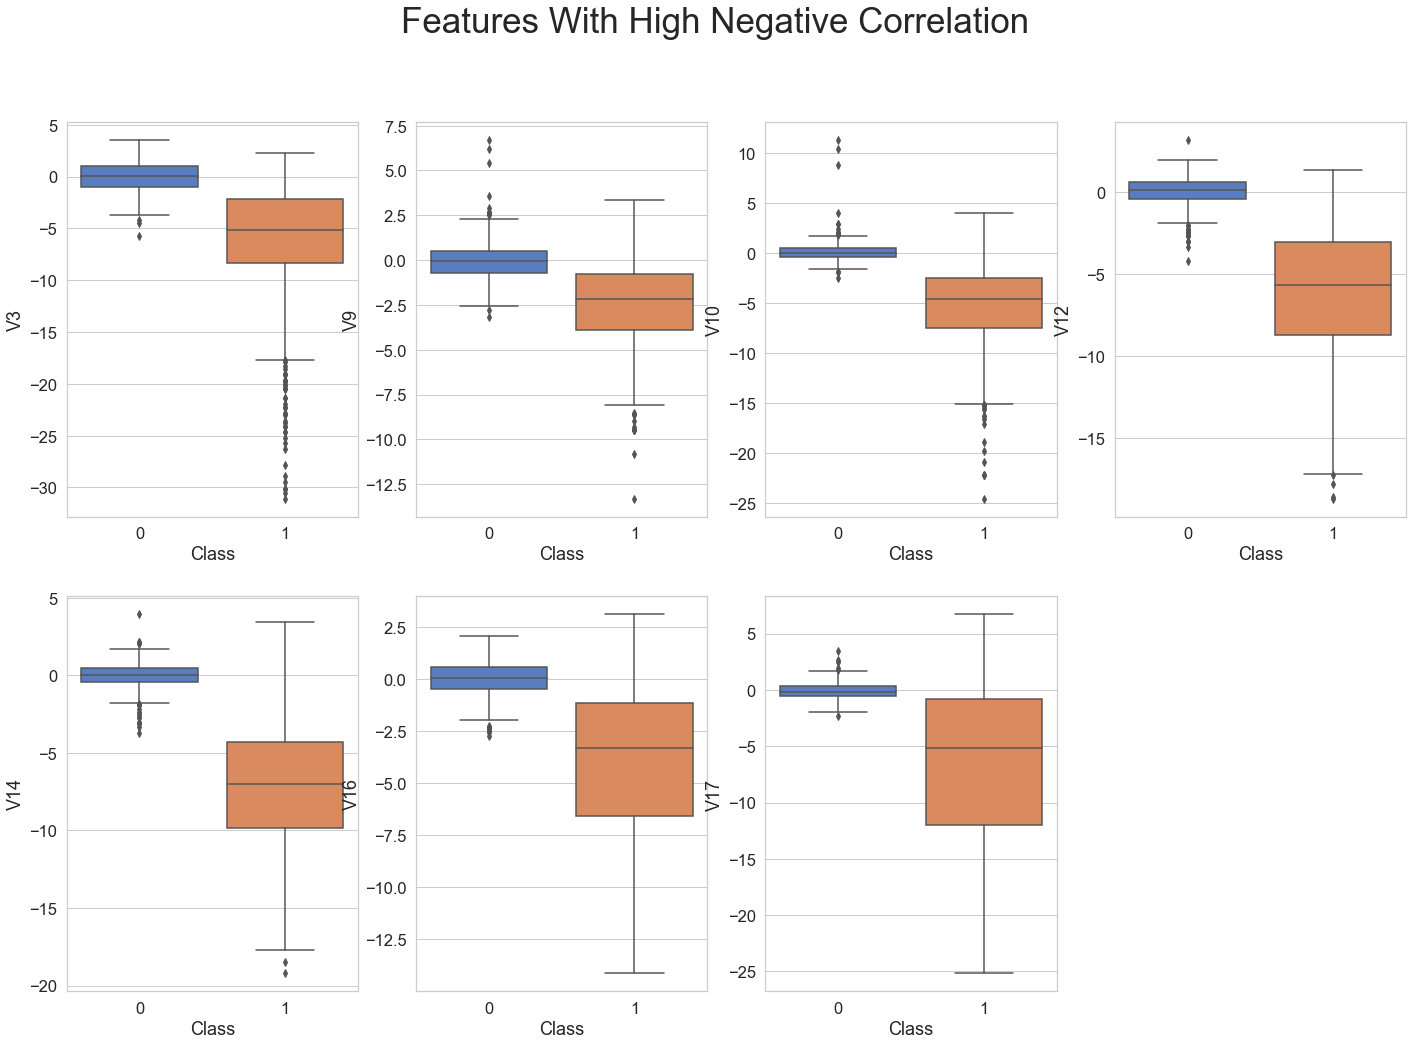

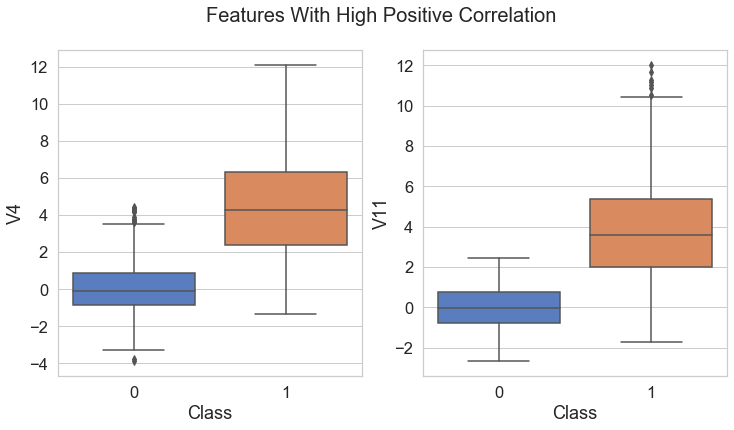

In [15]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(24,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=data_sub, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=data_sub, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=data_sub, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=data_sub, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=data_sub, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=data_sub, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=data_sub, ax=axes[1,2])
f.delaxes(axes[1,3])


f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=data_sub, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=data_sub, ax=axes[1])
plt.show()

Over sampling

Features With High Negative Correlation
        Class
V3  -0.563264
V9  -0.576163
V10 -0.636190
V12 -0.686023
V14 -0.761162
V16 -0.588940
V17 -0.556627
  
Features With High Positive Correlation
          Class
V2     0.510956
V4     0.720138
V11    0.694515
Class  1.000000


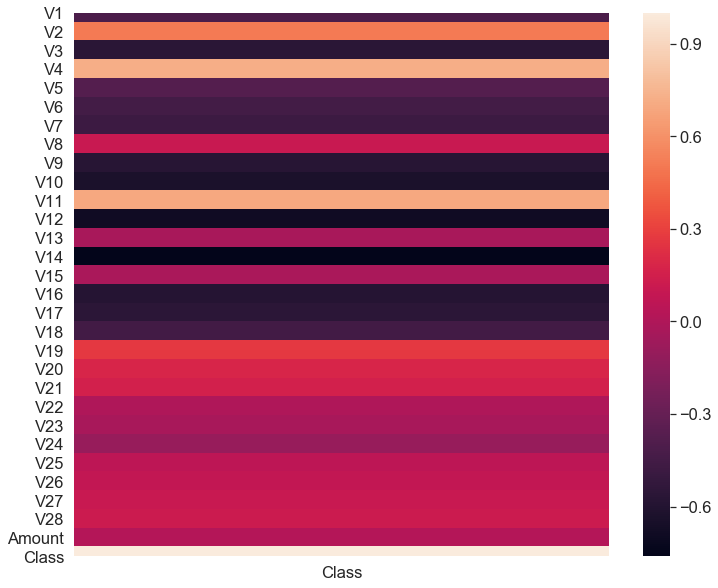

In [16]:
corr_over = data_over.corr()
corr_over = corr_over[['Class']]
corr = pd.concat([corr_sub, corr_over], axis=1,keys=['sub','over'])
corr
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr_over)
print('Features With High Negative Correlation')
print(corr_over[corr_over.Class < -0.5])
print('  ')
print('Features With High Positive Correlation')
print(corr_over[corr_over.Class > 0.5])

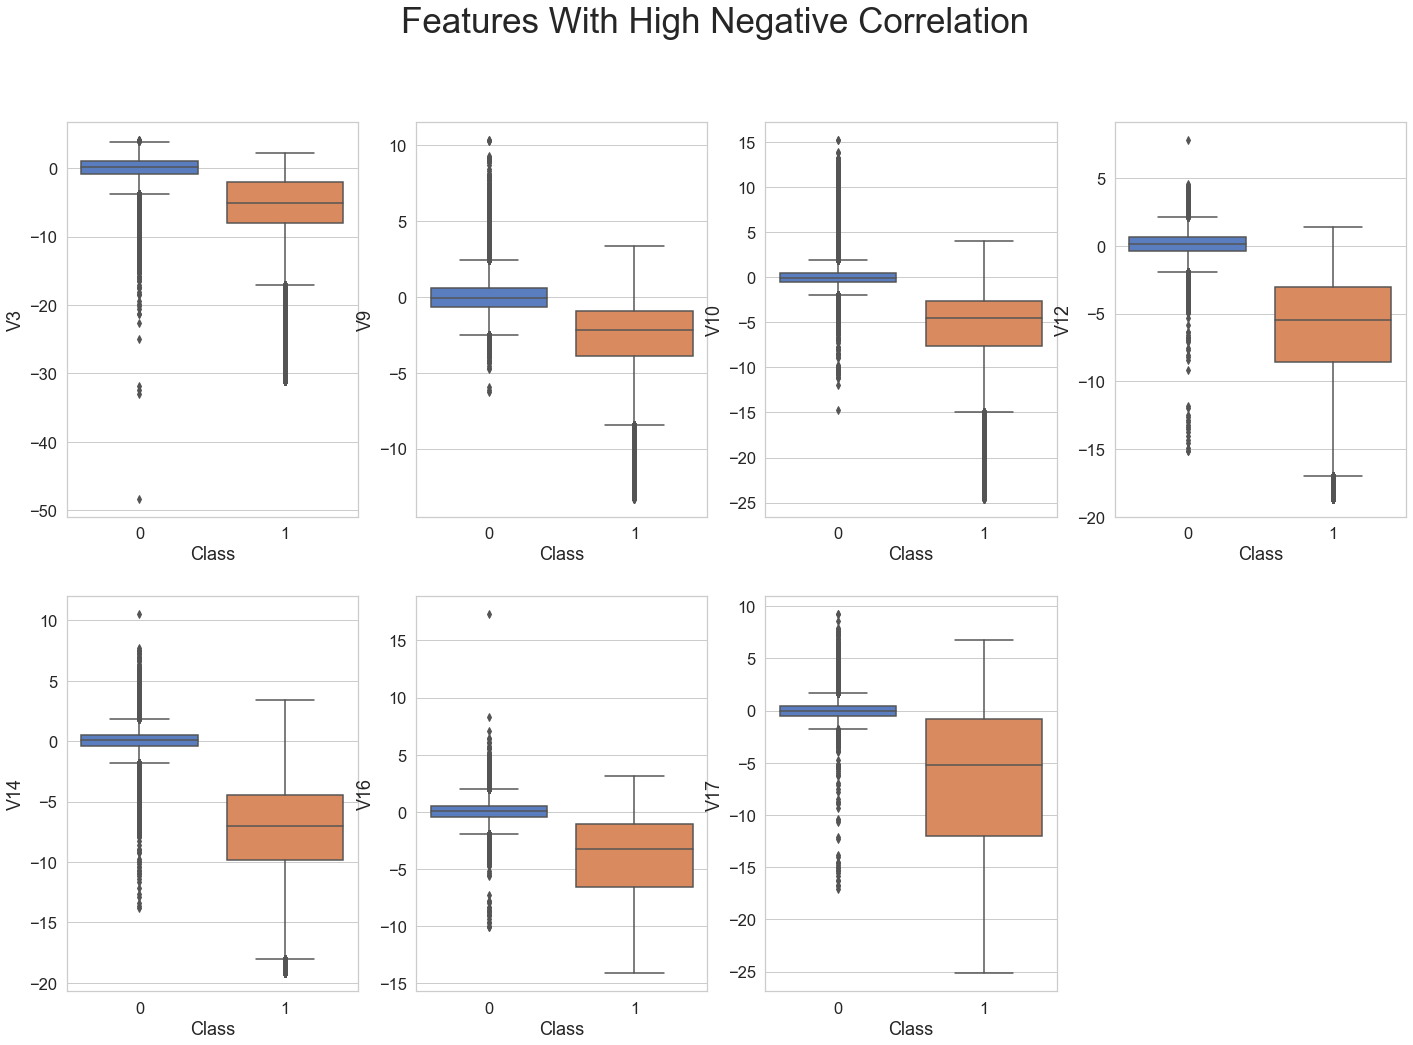

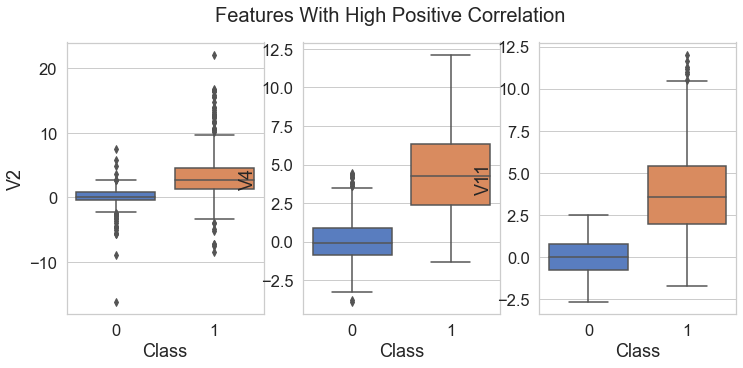

In [17]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(24,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=data_over, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=data_over, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=data_over, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=data_over, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=data_over, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=data_over, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=data_over, ax=axes[1,2])
f.delaxes(axes[1,3])

f, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V2", data=data_sub, ax=axes[0])
sns.boxplot(x="Class", y="V4", data=data_sub, ax=axes[1])
sns.boxplot(x="Class", y="V11", data=data_sub, ax=axes[2])
plt.show()

#### Conclusion for sampling: The correlation analysis of sub sampling and over sampling have no big difference.

### Supervised learning

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import time
from sklearn.model_selection import GridSearchCV

In [47]:
#tune parameters for logistic regression
tuned_parameters=[{'penalty':['l2'],
                   'C':[0.01,0.05,0.1,0.5,1,5,10],
                    'solver':['liblinear'],
                    'multi_class':['ovr']}]

clf=GridSearchCV(LogisticRegression(tol=1e-6, max_iter=100),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), decision_scores.ravel())
roc_auc_score = auc(fpr,tpr)
print('unbalanced samples')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)
print('----------------------------')


clf=GridSearchCV(LogisticRegression(tol=1e-6, max_iter=100),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train_sub,y_train_sub.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), decision_scores.ravel())
roc_auc_score = auc(fpr,tpr)
print('undersampling')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)
print('----------------------------')

clf=GridSearchCV(LogisticRegression(tol=1e-6, max_iter=100),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train_over,y_train_over.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), decision_scores.ravel())
roc_auc_score = auc(fpr,tpr)
print('uppersampling')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)

unbalanced samples
Best parameters set found: {'C': 5, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.85      0.60      0.70       113

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202

roc_auc_score: 0.9773830809366844
[[71077    12]
 [   45    68]]
time: 68.59311509132385
----------------------------
undersampling
Best parameters set found: {'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71089
           1       0.05      0.92      0.09       113

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.54     71202
weighted avg       1.00      0.97      0.98     7120

In [80]:
#tune parameters for LAD
tuned_parameters=[{'solver':['svd'],
                   'priors' : [(0.999,0.001),(0.5,0.5)]},
                 {'solver':['lsqr','eigen'],
                  'priors' : [(0.99,0.01),(0.5,0.5)],
                   'shrinkage':[0.0001,0.001,0.01,0.1,0.2]}]

clf=GridSearchCV(LinearDiscriminantAnalysis(tol=1e-6),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), decision_scores.ravel())
roc_auc_score = auc(fpr,tpr)
print('unbalanced samples')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)
print('----------------------------')


clf=GridSearchCV(LinearDiscriminantAnalysis(tol=1e-6),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train_sub,y_train_sub.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), decision_scores.ravel())
roc_auc_score = auc(fpr,tpr)
print('undersampling')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)
print('----------------------------')

clf=GridSearchCV(LinearDiscriminantAnalysis(tol=1e-6),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train_over,y_train_over.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), decision_scores.ravel())
roc_auc_score = auc(fpr,tpr)
print('uppersampling')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)

unbalanced samples
Best parameters set found: {'priors': (0.99, 0.01), 'shrinkage': 0.0001, 'solver': 'lsqr'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.83      0.75      0.79       113

    accuracy                           1.00     71202
   macro avg       0.92      0.88      0.90     71202
weighted avg       1.00      1.00      1.00     71202

roc_auc_score: 0.9816609044352603
[[71072    17]
 [   28    85]]
time: 55.21176099777222
----------------------------
undersampling
Best parameters set found: {'priors': (0.5, 0.5), 'shrinkage': 0.1, 'solver': 'lsqr'}
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71089
           1       0.19      0.84      0.30       113

    accuracy                           0.99     71202
   macro avg       0.59      0.92      0.65     71202
weighted avg       1.00      0.99      1.00     71202

roc_auc_score: 0.9

In [52]:
#tune parameters for KNN
tuned_parameters=[{'n_neighbors':[3,4,5],
                   'weights' : ['uniform','distance']}]


clf=GridSearchCV(KNeighborsClassifier(),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train_sub,y_train_sub.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
#decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred.ravel())
roc_auc_score = auc(fpr,tpr)
print('undersampling')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)
print('----------------------------')

#clf=GridSearchCV(KNeighborsClassifier(),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
#decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred.ravel())
roc_auc_score = auc(fpr,tpr)
print('unbalanced samples')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)
print('----------------------------')

#clf=GridSearchCV(KNeighborsClassifier(),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train_over,y_train_over.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
#decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred.ravel())
roc_auc_score = auc(fpr,tpr)
print('uppersampling')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)

undersampling
Best parameters set found: {'n_neighbors': 3, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71089
           1       0.05      0.92      0.09       113

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.54     71202
weighted avg       1.00      0.97      0.98     71202

roc_auc_score: 0.9446823295290947
[[68886  2203]
 [    9   104]]
time: 3.7017390727996826
----------------------------
unbalanced samples
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.87      0.77      0.82       113

    accuracy                           1.00     71202
   macro avg       0.93      0.88      0.91     71202
weighted avg       1.00      1.00      1.00     71202

roc_auc_score: 0.8848643175319185
[[71076    13]
 [   26    87]]
time: 2786.7949328422546
----------------------------
uppersa

In [54]:
#tune parameters for Decision Tree
tuned_parameters=[{'criterion':['entropy','gini'],
                   'max_depth' : [5,10,15]}]

clf=GridSearchCV(DecisionTreeClassifier(),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
#decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred.ravel())
roc_auc_score = auc(fpr,tpr)
print('unbalanced samples')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)
print('----------------------------')


clf=GridSearchCV(DecisionTreeClassifier(),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train_sub,y_train_sub.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
#decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred.ravel())
roc_auc_score = auc(fpr,tpr)
print('undersampling')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)
print('----------------------------')


clf=GridSearchCV(DecisionTreeClassifier(),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train_over,y_train_over.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
#decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred.ravel())
roc_auc_score = auc(fpr,tpr)
print('uppersampling')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)

unbalanced samples
Best parameters set found: {'criterion': 'entropy', 'max_depth': 5}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.81      0.81      0.81       113

    accuracy                           1.00     71202
   macro avg       0.90      0.90      0.90     71202
weighted avg       1.00      1.00      1.00     71202

roc_auc_score: 0.9025001316435326
[[71067    22]
 [   22    91]]
time: 185.70589590072632
----------------------------
undersampling
Best parameters set found: {'criterion': 'entropy', 'max_depth': 10}
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     71089
           1       0.01      0.88      0.03       113

    accuracy                           0.91     71202
   macro avg       0.51      0.90      0.49     71202
weighted avg       1.00      0.91      0.95     71202

roc_auc_score: 0.8959094899986394
[[64468  6621]
 [   13 

In [56]:
#tune parameters for Random Forest
tuned_parameters=[{'criterion':['entropy'],
                   'max_depth' : [3,4,5]}]

clf=GridSearchCV(RandomForestClassifier(random_state = 42),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
#decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred.ravel())
roc_auc_score = auc(fpr,tpr)
print('unbalanced samples')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)
print('----------------------------')


clf=GridSearchCV(RandomForestClassifier(random_state = 42),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train_sub,y_train_sub.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
#decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred.ravel())
roc_auc_score = auc(fpr,tpr)
print('undersampling')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)
print('----------------------------')


clf=GridSearchCV(RandomForestClassifier(random_state = 42),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train_over,y_train_over.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
#decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred.ravel())
roc_auc_score = auc(fpr,tpr)
print('uppersampling')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)

unbalanced samples
Best parameters set found: {'criterion': 'entropy', 'max_depth': 5}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.91      0.76      0.83       113

    accuracy                           1.00     71202
   macro avg       0.95      0.88      0.91     71202
weighted avg       1.00      1.00      1.00     71202

roc_auc_score: 0.8804676725186936
[[71080     9]
 [   27    86]]
time: 666.0098140239716
----------------------------
undersampling
Best parameters set found: {'criterion': 'entropy', 'max_depth': 5}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71089
           1       0.09      0.91      0.16       113

    accuracy                           0.98     71202
   macro avg       0.54      0.95      0.58     71202
weighted avg       1.00      0.98      0.99     71202

roc_auc_score: 0.9481912676581281
[[70014  1075]
 [   10   

In [57]:
#tune parameters for XGBoost
tuned_parameters=[{'criterion':['entropy'],
                   'learning_rate': [0.01, 0.02],
                   'max_depth' : [4,5,6]}]

clf=GridSearchCV(XGBClassifier(random_state = 42),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
#decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred.ravel())
roc_auc_score = auc(fpr,tpr)
print('unbalanced samples')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)
print('----------------------------')


clf=GridSearchCV(XGBClassifier(random_state = 42),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train_sub,y_train_sub.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
#decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred.ravel())
roc_auc_score = auc(fpr,tpr)
print('undersampling')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)
print('----------------------------')


clf=GridSearchCV(XGBClassifier(random_state = 42),tuned_parameters,cv=5)
start_time = time.time()
clf.fit(X_train_over,y_train_over.values.ravel())
y_pred = clf.predict(X_test)
t = time.time() - start_time 
#decision_scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred.ravel())
roc_auc_score = auc(fpr,tpr)
print('uppersampling')
print('Best parameters set found:',clf.best_params_)
print(classification_report(y_test,y_pred))
print('roc_auc_score:', roc_auc_score)
print(confusion_matrix(y_test,clf.predict(X_test)))
print('time:',t)

unbalanced samples
Best parameters set found: {'criterion': 'entropy', 'learning_rate': 0.02, 'max_depth': 5}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.92      0.83      0.87       113

    accuracy                           1.00     71202
   macro avg       0.96      0.92      0.94     71202
weighted avg       1.00      1.00      1.00     71202

roc_auc_score: 0.9158729360441485
[[71081     8]
 [   19    94]]
time: 1996.5928688049316
----------------------------
undersampling
Best parameters set found: {'criterion': 'entropy', 'learning_rate': 0.02, 'max_depth': 5}
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71089
           1       0.04      0.94      0.08       113

    accuracy                           0.96     71202
   macro avg       0.52      0.95      0.53     71202
weighted avg       1.00      0.96      0.98     71202

roc_auc_scor

XGBoost with imbalnced samples
confusion matrix:
 [[71081     8]
 [   19    94]]
accuracy score: 0.9996207971686188
precision: 0.9215686274509803
recall: 0.831858407079646
f1_score: 0.8744186046511628
pr_auc_score: 0.8721215717452715


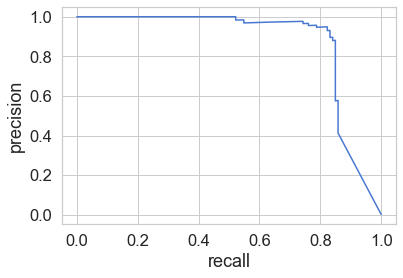

roc_auc_score: 0.929042828900629


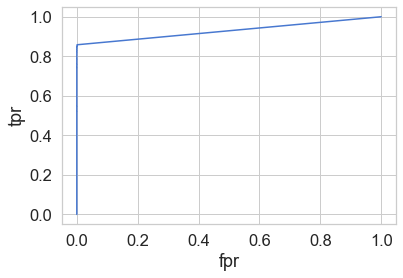

XGBoost with Downsampling
confusion matrix:
 [[68585  2504]
 [    7   106]]
accuracy score: 0.9647341366815539
precision: 0.04061302681992337
recall: 0.9380530973451328
f1_score: 0.07785530664708042
pr_auc_score: 0.7204414725923154


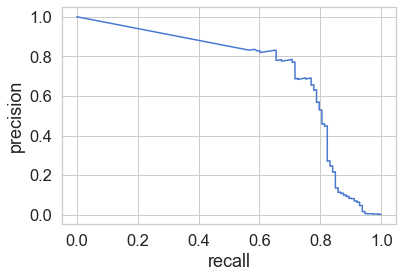

roc_auc_score: 0.9743018753632644


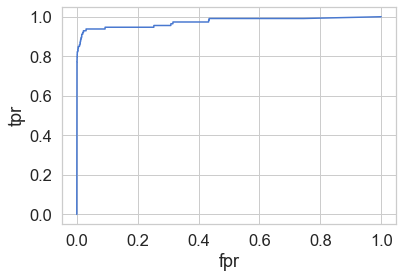

XGBoost with Uppersampling
confusion matrix:
 [[70434   655]
 [   16    97]]
accuracy score: 0.9905761074127132
precision: 0.12898936170212766
recall: 0.8584070796460177
f1_score: 0.22427745664739887
pr_auc_score: 0.4013077866528767


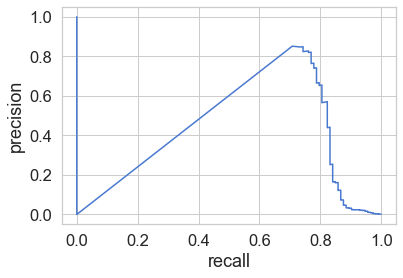

roc_auc_score: 0.974959532840362


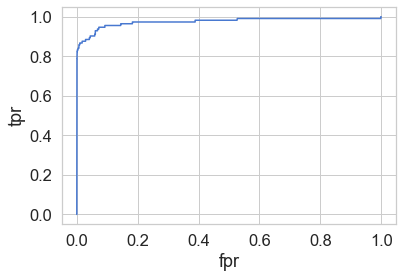

In [61]:
#XGBoost with best hyper-parameters
start_time = time.time()
xgb_1 = XGBClassifier(criterion='entropy',learning_rate= 0.02,max_depth= 5).fit(X_train, y_train.values.ravel())
y_predict = xgb_1.predict(X_test)
confusion = confusion_matrix(y_test, y_predict)
score = xgb_1.score(X_test, y_test)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test.values.ravel(), y_predict)
print('XGBoost with imbalnced samples')
print('confusion matrix:\n', confusion)
print('accuracy score:', score)
print('precision:', precision)
print('recall:', recall)
print('f1_score:', f1)
decision_scores = xgb_1.predict_proba(X_test)
#PR
precision, recall, thresholds = precision_recall_curve(y_test, decision_scores[:,1])
pr_auc_score = auc(recall, precision)
print('pr_auc_score:', pr_auc_score)
plt.figure()
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()
#ROC 
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), decision_scores[:,1])
roc_auc_score = auc(fpr,tpr)
print('roc_auc_score:', roc_auc_score)
plt.figure() 
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
#------------------------------------------------------------------------
start_time = time.time()
xgb_2 = XGBClassifier(criterion='entropy',learning_rate= 0.02,max_depth= 5).fit(X_train_sub, y_train_sub.values.ravel())
y_predict = xgb_2.predict(X_test)
confusion = confusion_matrix(y_test, y_predict)
score = xgb_2.score(X_test, y_test)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test.values.ravel(), y_predict)
print('XGBoost with Downsampling')
print('confusion matrix:\n', confusion)
print('accuracy score:', score)
print('precision:', precision)
print('recall:', recall)
print('f1_score:', f1)
decision_scores = xgb_2.predict_proba(X_test)
#PR
precision, recall, thresholds = precision_recall_curve(y_test, decision_scores[:,1])
pr_auc_score = auc(recall, precision)
print('pr_auc_score:', pr_auc_score)
plt.figure()
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()
#ROC 
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), decision_scores[:,1])
roc_auc_score = auc(fpr,tpr)
print('roc_auc_score:', roc_auc_score)
plt.figure() 
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
#------------------------------------------------------------------------
start_time = time.time()
xgb_3 = XGBClassifier(criterion='entropy',learning_rate= 0.02,max_depth= 6).fit(X_train_over, y_train_over.values.ravel())
y_predict = xgb_3.predict(X_test)
confusion = confusion_matrix(y_test, y_predict)
score = xgb_3.score(X_test, y_test)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test.values.ravel(), y_predict)
print('XGBoost with Uppersampling')
print('confusion matrix:\n', confusion)
print('accuracy score:', score)
print('precision:', precision)
print('recall:', recall)
print('f1_score:', f1)
decision_scores = xgb_3.predict_proba(X_test)
#PR
precision, recall, thresholds = precision_recall_curve(y_test, decision_scores[:,1])
pr_auc_score = auc(recall, precision)
print('pr_auc_score:', pr_auc_score)
plt.figure()
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()
#ROC 
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), decision_scores[:,1])
roc_auc_score = auc(fpr,tpr)
print('roc_auc_score:', roc_auc_score)
plt.figure() 
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

#### Visualizaion of feature importance of three cases from XGBoost

<Figure size 1080x720 with 0 Axes>

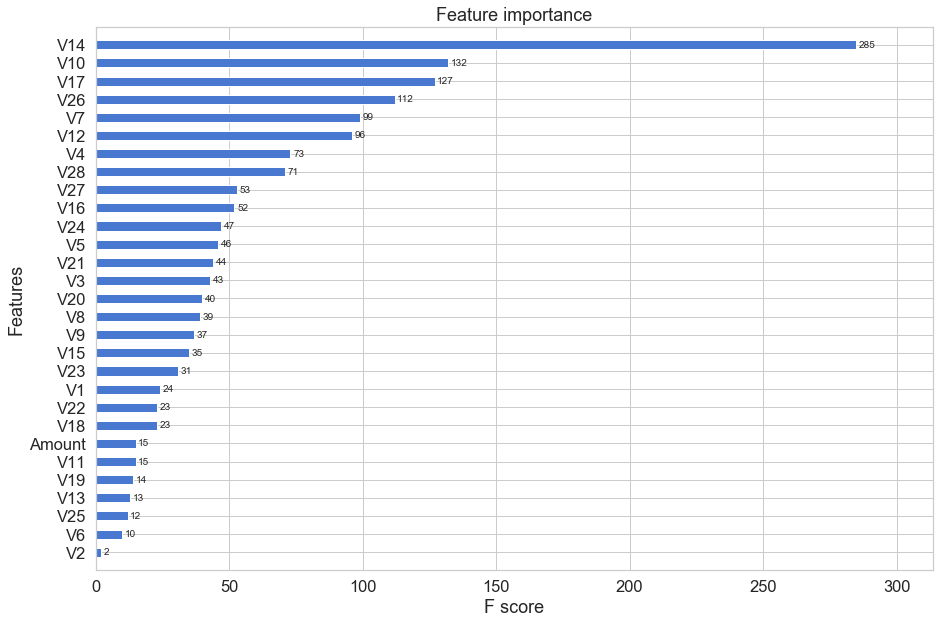

<Figure size 1080x720 with 0 Axes>

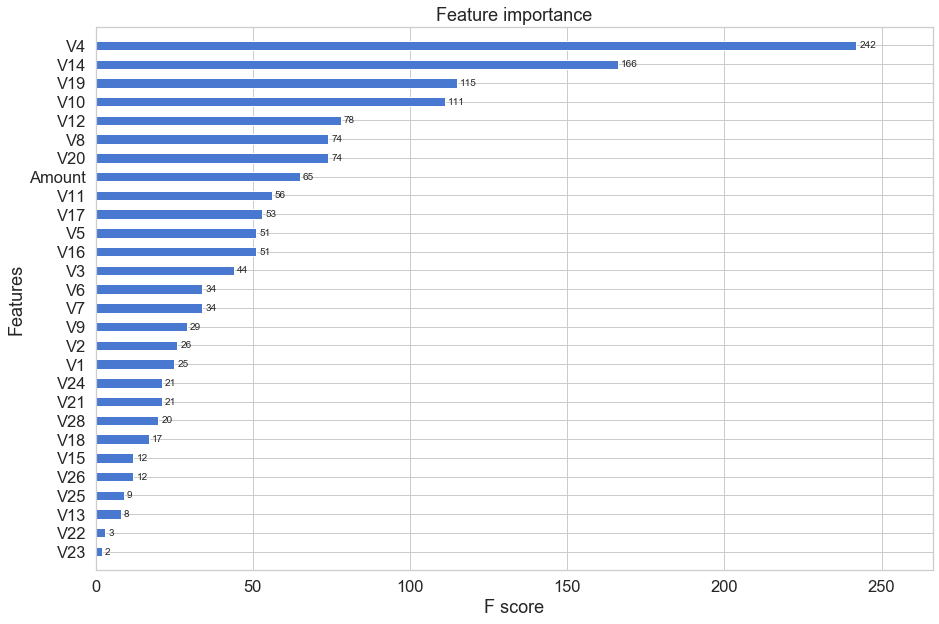

<Figure size 1080x720 with 0 Axes>

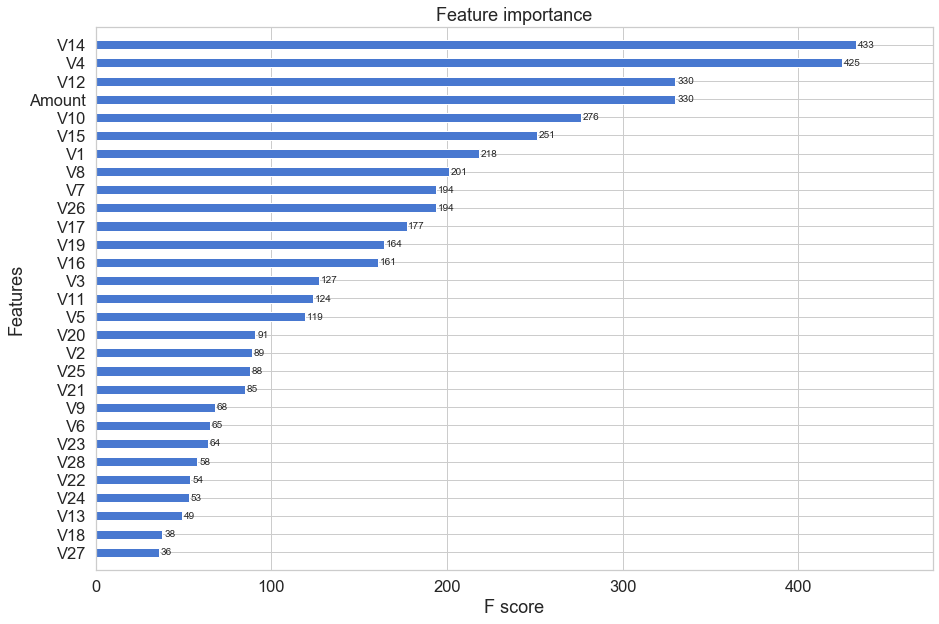

In [73]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
from xgboost import plot_importance
plt.figure()
plot_importance(xgb_1,height=0.5,max_num_features=64)
plt.show()
plt.figure()
plot_importance(xgb_2,height=0.5,max_num_features=64)
plt.show()
plt.figure()
plot_importance(xgb_3,height=0.5,max_num_features=64)
plt.show()

#### Unsupervised Learning--isolation forest

In [81]:
from sklearn.ensemble import IsolationForest  
from scipy import stats  
rng = np.random.RandomState(42)

start_time = time.time()
isof = IsolationForest(random_state=rng,contamination='auto',warm_start=True)
isof.fit(X_data)

y_pred_train = isof.predict(X_test)
t = time.time() - start_time
y_pred_train = -y_pred_train
y_pred_train[y_pred_train == -1] = 0

decision_scores = isof.decision_function(X_test)

confusion = confusion_matrix(y_test, y_pred_train)

precision = precision_score(y_test, y_pred_train)
recall = recall_score(y_test, y_pred_train)
f1 = f1_score(y_test.values.ravel(), y_pred_train)
print('Isolation Forest with imbalanced samples')
print('confusion matrix:\n', confusion)
print('accuracy score:', score)
print('precision:', precision)
print('recall:', recall)
print('f1_score:', f1)
print('time:',t)
print('-------------------------------------------------------')

start_time = time.time()
isof = IsolationForest(random_state=rng,contamination='auto',warm_start=True)
isof.fit(X_train_sub)

y_pred_train = isof.predict(X_test)
t = time.time() - start_time
y_pred_train = -y_pred_train
y_pred_train[y_pred_train == -1] = 0

decision_scores = isof.decision_function(X_test)

confusion = confusion_matrix(y_test, y_pred_train)

precision = precision_score(y_test, y_pred_train)
recall = recall_score(y_test, y_pred_train)
f1 = f1_score(y_test.values.ravel(), y_pred_train)
print('Isolation Forest with undersampling')
print('confusion matrix:\n', confusion)
print('accuracy score:', score)
print('precision:', precision)
print('recall:', recall)
print('f1_score:', f1)
print('time:',t)
print('-------------------------------------------------------')

start_time = time.time()
isof = IsolationForest(random_state=rng,contamination='auto',warm_start=True)
isof.fit(X_train_over)

y_pred_train = isof.predict(X_test)
t = time.time() - start_time
y_pred_train = -y_pred_train
y_pred_train[y_pred_train == -1] = 0

decision_scores = isof.decision_function(X_test)

confusion = confusion_matrix(y_test, y_pred_train)

precision = precision_score(y_test, y_pred_train)
recall = recall_score(y_test, y_pred_train)
f1 = f1_score(y_test.values.ravel(), y_pred_train)
print('Isolation Forest with oversampling')
print('confusion matrix:\n', confusion)
print('accuracy score:', score)
print('precision:', precision)
print('recall:', recall)
print('f1_score:', f1)
print('time:',t)

Isolation Forest with imbalanced samples
confusion matrix:
 [[68217  2872]
 [   19    94]]
accuracy score: 0.9736102918457347
precision: 0.03169251517194875
recall: 0.831858407079646
f1_score: 0.06105878531990906
time: 5.161452770233154
-------------------------------------------------------
Isolation Forest with undersampling
confusion matrix:
 [[70439   650]
 [   83    30]]
accuracy score: 0.9736102918457347
precision: 0.04411764705882353
recall: 0.26548672566371684
f1_score: 0.07566204287515763
time: 2.0597870349884033
-------------------------------------------------------
Isolation Forest with oversampling
confusion matrix:
 [[70147   942]
 [   77    36]]
accuracy score: 0.9736102918457347
precision: 0.03680981595092025
recall: 0.3185840707964602
f1_score: 0.06599450045829514
time: 6.233825206756592


#### Select featues following the importance order of imbalanced samples generated by XGBoost

2 top features
training roc_auc: 0.8690
Recall: 0.911504424778761
Precision: 0.008452322337108157
test roc_auc: 0.8708
[[59006 12083]
 [   10   103]]
3 top features
training roc_auc: 0.8908
Recall: 0.9292035398230089
Precision: 0.012550800860626345
test roc_auc: 0.9065
[[62828  8261]
 [    8   105]]
4 top features
training roc_auc: 0.9045
Recall: 0.9380530973451328
Precision: 0.0150997150997151
test roc_auc: 0.9204
[[64175  6914]
 [    7   106]]
5 top features
training roc_auc: 0.8961
Recall: 0.9203539823008849
Precision: 0.01481903676261043
test roc_auc: 0.9115
[[64175  6914]
 [    9   104]]
6 top features
training roc_auc: 0.9117
Recall: 0.911504424778761
Precision: 0.021789718637613708
test roc_auc: 0.9232
[[66465  4624]
 [   10   103]]
7 top features
training roc_auc: 0.9032
Recall: 0.9026548672566371
Precision: 0.018511796733212342
test roc_auc: 0.9133
[[65681  5408]
 [   11   102]]
8 top features
training roc_auc: 0.9174
Recall: 0.911504424778761
Precision: 0.022662266226622662
t

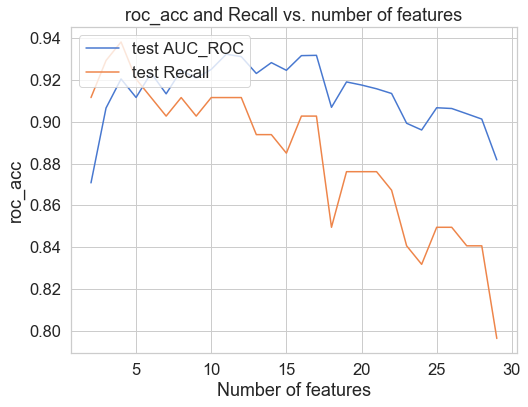

In [87]:
#follow the importance of features of imbalanced samples generated by XGBoost
#major hyperparameter: contamination

from sklearn.ensemble import IsolationForest 
features = ['V14','V10','V17','V26','V7','V12','V4','V28','V27','V16','V24','V5','V21','V3','V20','V8','V9','V15','V23','V1','V22','V28','Amount','V11','V19','V13','V25','V6','V2']
xaxis = list(range(2,len(features)+1))
train_acc = []
test_acc = []
recall_lis = []

for i in range(1,len(features)):
    print(i+1,'top features')
    features_selected = features[0:i]
    X_train_iforest = X_train[features_selected]
    X_test_iforest = X_test[features_selected]
    
    iforest = IsolationForest(random_state=42,contamination='auto',warm_start=True)
    iforest.fit(X_train_iforest)
    y_pred_train = iforest.predict(X_train_iforest)
    y_pred_train = -y_pred_train
    y_pred_train[y_pred_train == -1] = 0
    
    fpr, tpr, thresholds = roc_curve(y_train.values.ravel(), y_pred_train)
    roc_auc = auc(fpr,tpr)
    train_acc.append(roc_auc)
    print('training roc_auc:',"%.4f" % roc_auc)
    
    y_pred_test = iforest.predict(X_test_iforest)
    y_pred_test = - y_pred_test
    y_pred_test[y_pred_test == -1] = 0
    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred_test)
    precision = precision_score(y_test.values.ravel(), y_pred_test)
    recall = recall_score(y_test.values.ravel(), y_pred_test)
    recall_lis.append(recall)
    roc_auc = auc(fpr,tpr)
    test_acc.append(roc_auc)
    print('Recall:',recall)
    print('Precision:',precision)
    print('test roc_auc:', "%.4f" % roc_auc)
    conf_matrix = confusion_matrix(y_test.values.ravel(), y_pred_test)
    print(conf_matrix)

plt.figure(figsize=(8,6))    
#plt.plot(xaxis,train_acc,label='training')
plt.plot(xaxis,test_acc,label='test AUC_ROC')
plt.plot(xaxis,recall_lis,label='test Recall')
plt.legend(loc='upper left')
plt.xlabel('Number of features')
plt.ylabel('roc_acc')
plt.title('roc_acc and Recall vs. number of features')
plt.show()

#### When select 4 top features, we have the highest recall.

### Deep learning

In [88]:
import torch
import torch.optim as optim
from torch.autograd import Variable
from torch.autograd import grad
import torch.nn as nn
import torch.nn.functional as F

In [89]:
#convert form numpy to tenser
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()
X_train_tensor = torch.from_numpy(X_train_np).type(torch.FloatTensor)
X_test_tensor = torch.from_numpy(X_test_np.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train_np).type(torch.FloatTensor)
y_test_tensor = torch.from_numpy(y_test_np.astype(np.float32))
X_train_sub_np = X_train_sub.to_numpy()
y_train_sub_np = y_train_sub.to_numpy()
X_train_sub_tensor = torch.from_numpy(X_train_sub_np).type(torch.FloatTensor)
y_train_sub_tensor = torch.from_numpy(y_train_sub_np).type(torch.FloatTensor)
X_train_over_np = X_train_over.to_numpy()
y_train_over_np = y_train_over.to_numpy()
X_train_over_tensor = torch.from_numpy(X_train_over_np).type(torch.FloatTensor)
y_train_over_tensor = torch.from_numpy(y_train_over_np).type(torch.FloatTensor)

In [105]:
#tanh activation function have higher recall than sigmoid and relu.

#one hidden layer network
class Net(nn.Module):
    def __init__(self,n_features,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = nn.Linear(n_features,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x = F.tanh(self.hidden(x))
        y_predicted =self.predict(x)
        return y_predicted

#two hidden layers network
class Net2(nn.Module):
    def __init__(self,n_features,n_hidden_1,n_hidden_2,n_output):
        super(Net2,self).__init__()
        self.hidden_1 = nn.Linear(n_features,n_hidden_1)
        self.hidden_2 = nn.Linear(n_hidden_1,n_hidden_2)
        self.predict = nn.Linear(n_hidden_2,n_output)
        
    def forward(self,x):
        x = F.tanh(self.hidden_1(x))
        x = F.tanh(self.hidden_2(x))
        y_predicted =self.predict(x)
        return y_predicted

In [100]:
#Glorot initialization
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0)

In [101]:
def train_FNN(X_train_tensor,X_test_tensor,y_train_tensor,y_test_tensor,layer): 
    
    if layer == 1:
        net_model = Net(n_features,30,2) 
    elif layer ==2:
        net_model = Net2(n_features,50,50,2) 
    else:
        print('layer should be 1 or 2')
        net_model = Net(n_features,15,2) 
        
    print(net_model)
    net_model.apply(init_weights)
    learning_rate = 0.001
    criterion_net = nn.CrossEntropyLoss()
    optimizer_net = torch.optim.RMSprop(net_model.parameters(),lr = learning_rate)
    y_train_tensor = y_train_tensor.type(torch.LongTensor)
    y_test_tensor = y_test_tensor.type(torch.LongTensor)
    loss_lis = []
    loss_test_lis = []
    acc_lis = []
    epoch_lis = []
    recall_lis = []
    
    num_epochs = 3000
    for epoch in range(num_epochs):
        #forward pass
        y_predicted = net_model(X_train_tensor)
        loss = criterion_net(y_predicted.squeeze(),y_train_tensor.squeeze())
        #zero gradients
        optimizer_net.zero_grad()
        #back pass
        loss.backward()
        #update weights
        optimizer_net.step()  
    
        if(epoch +1 )%200 ==0:
            epoch_lis.append(epoch)
            loss_lis.append(loss)    
            y_predicted = net_model(X_test_tensor)
            loss_test = criterion_net(y_predicted.squeeze(),y_test_tensor.squeeze())
            loss_test_lis.append(loss_test)              
            y_pred = torch.max(y_predicted , 1)[1]        
            y_test_tensor = y_test_tensor.squeeze()        
            #acc =  y_pred.eq(y_test_tensor).sum() /float(y_test_tensor.shape[0])            
            #acc_lis.append(acc)
            
            fpr, tpr, thresholds = roc_curve(y_test_tensor.numpy(), y_pred.numpy())
            
            roc_auc = auc(fpr,tpr)
            acc_lis.append(roc_auc)
            conf_matrix = confusion_matrix(y_test_tensor.numpy(), y_pred.numpy())
            recall = recall_score(y_test_tensor.numpy(), y_pred.numpy())
            recall_lis.append(recall)
            precision = precision_score(y_test_tensor.numpy(), y_pred.numpy())
            print(f'epoch:{epoch+1},training loss = {loss.item():.4f},test loss = {loss_test.item():.4f},test roc accuracy = {roc_auc:.4f}')
            print('test roc_auc:',roc_auc)
            print(conf_matrix)
            print('Recall:',recall)
            print('Precision:',precision)

    return max(acc_lis),epoch_lis,loss_lis,loss_test_lis,acc_lis,recall_lis
    

Net2(
  (hidden_1): Linear(in_features=29, out_features=50, bias=True)
  (hidden_2): Linear(in_features=50, out_features=50, bias=True)
  (predict): Linear(in_features=50, out_features=2, bias=True)
)
epoch:200,training loss = 0.0031,test loss = 0.0031,test roc accuracy = 0.8937
test roc_auc: 0.8936787078692459
[[71071    18]
 [   24    89]]
Recall: 0.7876106194690266
Precision: 0.8317757009345794
epoch:400,training loss = 0.0021,test loss = 0.0025,test roc accuracy = 0.8893
test roc_auc: 0.8892961297299397
[[71077    12]
 [   25    88]]
Recall: 0.7787610619469026
Precision: 0.88
epoch:600,training loss = 0.0015,test loss = 0.0026,test roc accuracy = 0.8893
test roc_auc: 0.8892961297299397
[[71077    12]
 [   25    88]]
Recall: 0.7787610619469026
Precision: 0.88
epoch:800,training loss = 0.0011,test loss = 0.0029,test roc accuracy = 0.8937
test roc_auc: 0.893727941927961
[[71078    11]
 [   24    89]]
Recall: 0.7876106194690266
Precision: 0.89
epoch:1000,training loss = 0.0007,test los

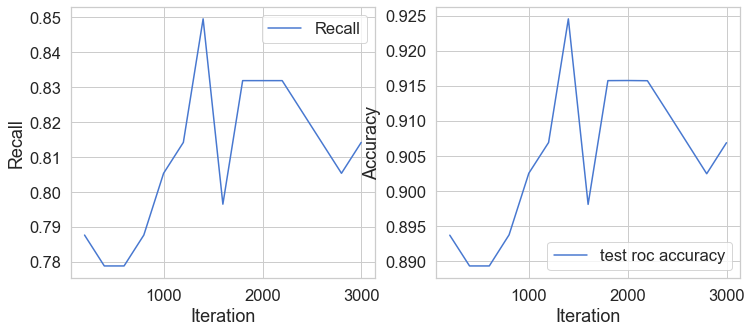

maximal accuracy:0.9245
time: 813.2604260444641


In [119]:
n_features = 29
start_time = time.time()
acc,epoch_lis,loss_lis,loss_test_lis,acc_lis,recall_lis = train_FNN(X_train_tensor,X_test_tensor,y_train_tensor,y_test_tensor,2)
t = time.time() - start_time
plt.figure(1,figsize=(12,5))
plt.subplot(1,2,1)

plt.plot(epoch_lis,recall_lis,label = 'Recall')
#plt.plot(epoch_lis,loss_test_lis,label = 'test loss')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epoch_lis,acc_lis,label = 'test roc accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f'maximal accuracy:{acc.item():.4f}')
print('time:', t)

Net2(
  (hidden_1): Linear(in_features=29, out_features=50, bias=True)
  (hidden_2): Linear(in_features=50, out_features=50, bias=True)
  (predict): Linear(in_features=50, out_features=2, bias=True)
)
epoch:200,training loss = 0.0130,test loss = 0.1944,test roc accuracy = 0.9361
test roc_auc: 0.9361022833524024
[[67037  4052]
 [    8   105]]
Recall: 0.9292035398230089
Precision: 0.02525859995188838
epoch:400,training loss = 0.0016,test loss = 0.3065,test roc accuracy = 0.9370
test roc_auc: 0.9369540761381377
[[66529  4560]
 [    7   106]]
Recall: 0.9380530973451328
Precision: 0.02271753107586798
epoch:600,training loss = 0.0003,test loss = 0.3895,test roc accuracy = 0.9358
test roc_auc: 0.9358427930985677
[[66371  4718]
 [    7   106]]
Recall: 0.9380530973451328
Precision: 0.02197346600331675
epoch:800,training loss = 0.0001,test loss = 0.4546,test roc accuracy = 0.9351
test roc_auc: 0.9351324159656778
[[66270  4819]
 [    7   106]]
Recall: 0.9380530973451328
Precision: 0.0215228426395

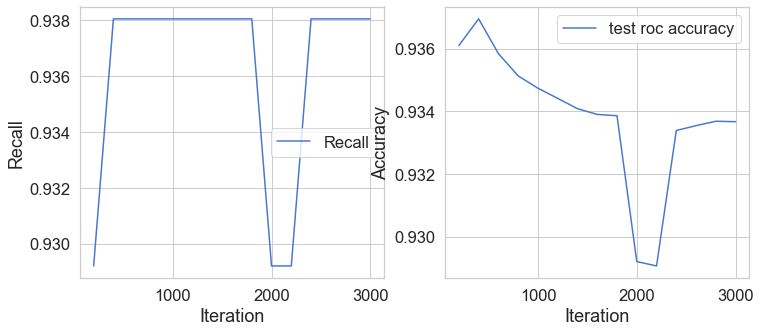

maximal accuracy:0.9370
time: 6.515398025512695


In [121]:
start_time = time.time()
acc,epoch_lis,loss_lis,loss_test_lis,acc_lis,recall_lis = train_FNN(X_train_sub_tensor,X_test_tensor,y_train_sub_tensor,y_test_tensor,2)
t = time.time()-start_time
plt.figure(1,figsize=(12,5))
plt.subplot(1,2,1)

plt.plot(epoch_lis,recall_lis,label = 'Recall')
#plt.plot(epoch_lis,loss_test_lis,label = 'test loss')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epoch_lis,acc_lis,label = 'test roc accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f'maximal accuracy:{acc.item():.4f}')
print('time:', t)

Net2(
  (hidden_1): Linear(in_features=29, out_features=50, bias=True)
  (hidden_2): Linear(in_features=50, out_features=50, bias=True)
  (predict): Linear(in_features=50, out_features=2, bias=True)
)
epoch:200,training loss = 0.0453,test loss = 0.0596,test roc accuracy = 0.9552
test roc_auc: 0.9551628975121177
[[69747  1342]
 [    8   105]]
Recall: 0.9292035398230089
Precision: 0.07256392536281962
epoch:400,training loss = 0.0191,test loss = 0.0312,test roc accuracy = 0.9465
test roc_auc: 0.9465306296220729
[[70407   682]
 [   11   102]]
Recall: 0.9026548672566371
Precision: 0.13010204081632654
epoch:600,training loss = 0.0116,test loss = 0.0232,test roc accuracy = 0.9478
test roc_auc: 0.947824782022585
[[70591   498]
 [   11   102]]
Recall: 0.9026548672566371
Precision: 0.17
epoch:800,training loss = 0.0078,test loss = 0.0187,test roc accuracy = 0.9399
test roc_auc: 0.9398684709942927
[[70718   371]
 [   13   100]]
Recall: 0.8849557522123894
Precision: 0.21231422505307856
epoch:1000,

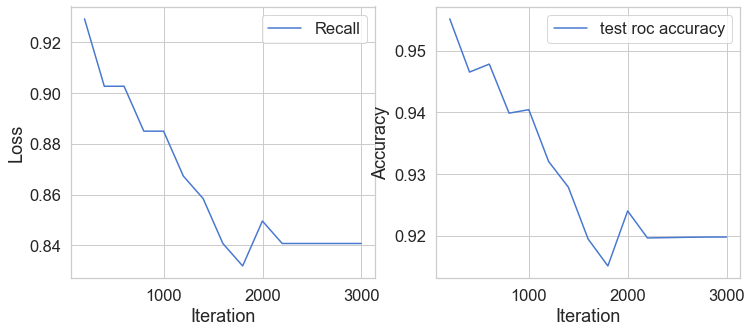

maximal accuracy:0.9552
time: 1600.808000087738


In [123]:
start_time = time.time()
acc,epoch_lis,loss_lis,loss_test_lis,acc_lis,recall_lis = train_FNN(X_train_over_tensor,X_test_tensor,y_train_over_tensor,y_test_tensor,2)
t = time.time() - start_time
plt.figure(1,figsize=(12,5))
plt.subplot(1,2,1)

plt.plot(epoch_lis,recall_lis,label = 'Recall')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epoch_lis,acc_lis,label = 'test roc accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f'maximal accuracy:{acc.item():.4f}')
print('time:', t)